In [1]:
import pandas as pd

# Load the dataset
file_path = 'DoctorVisits-DA.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Display the first few rows of the dataframe to understand its structure
print(df.head())
print(df.columns)

   Unnamed: 0  visits  gender   age  income  illness  reduced  health private  \
0           1       1  female  0.19    0.55        1        4       1     yes   
1           2       1  female  0.19    0.45        1        2       1     yes   
2           3       1    male  0.19    0.90        3        0       0      no   
3           4       1    male  0.19    0.15        1        0       0      no   
4           5       1    male  0.19    0.45        2        5       1      no   

  freepoor freerepat nchronic lchronic  
0       no        no       no       no  
1       no        no       no       no  
2       no        no       no       no  
3       no        no       no       no  
4       no        no      yes       no  
Index(['Unnamed: 0', 'visits', 'gender', 'age', 'income', 'illness', 'reduced',
       'health', 'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')


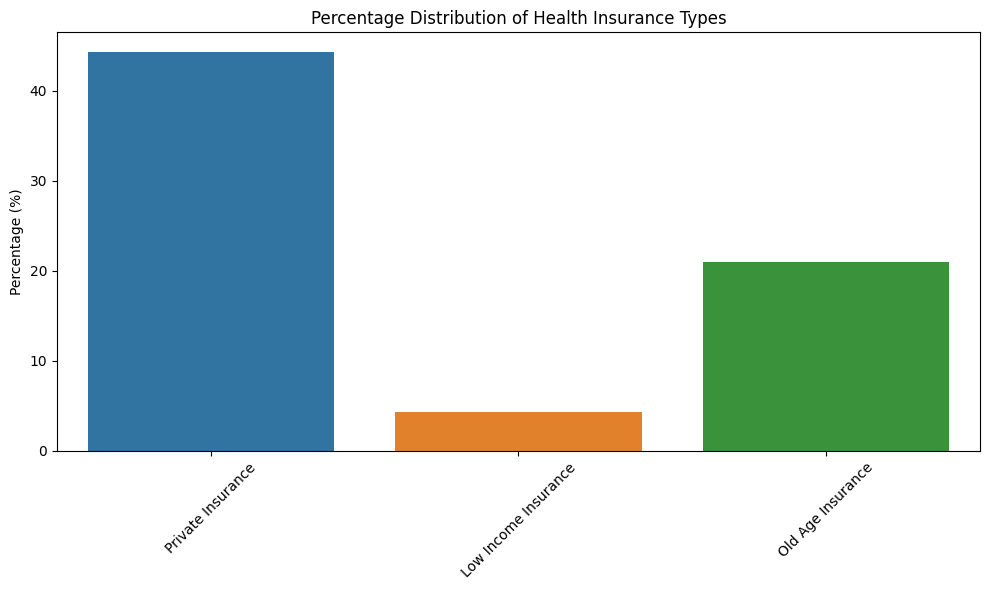

Percentage of people with:
Private Insurance: 44.28%
Government Insurance (Low Income): 4.28%
Government Insurance (Old Age): 21.02%


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentages
total_people = len(df)
private_insurance = (df['private'] == 'yes').sum() / total_people * 100
freepoor_insurance = (df['freepoor'] == 'yes').sum() / total_people * 100
freerepat_insurance = (df['freerepat'] == 'yes').sum() / total_people * 100

# Create data for plotting
insurance_types = ['Private Insurance', 'Low Income Insurance', 'Old Age Insurance']
percentages = [private_insurance, freepoor_insurance, freerepat_insurance]

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=insurance_types, y=percentages)
plt.title('Percentage Distribution of Health Insurance Types')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the exact percentages
print(f"Percentage of people with:")
print(f"Private Insurance: {private_insurance:.2f}%")
print(f"Government Insurance (Low Income): {freepoor_insurance:.2f}%")
print(f"Government Insurance (Old Age): {freerepat_insurance:.2f}%")

Based on the analysis:

Private insurance is the most common at 44.28%
Government insurance for old age covers 21.02%
Low income government insurance covers 4.28%

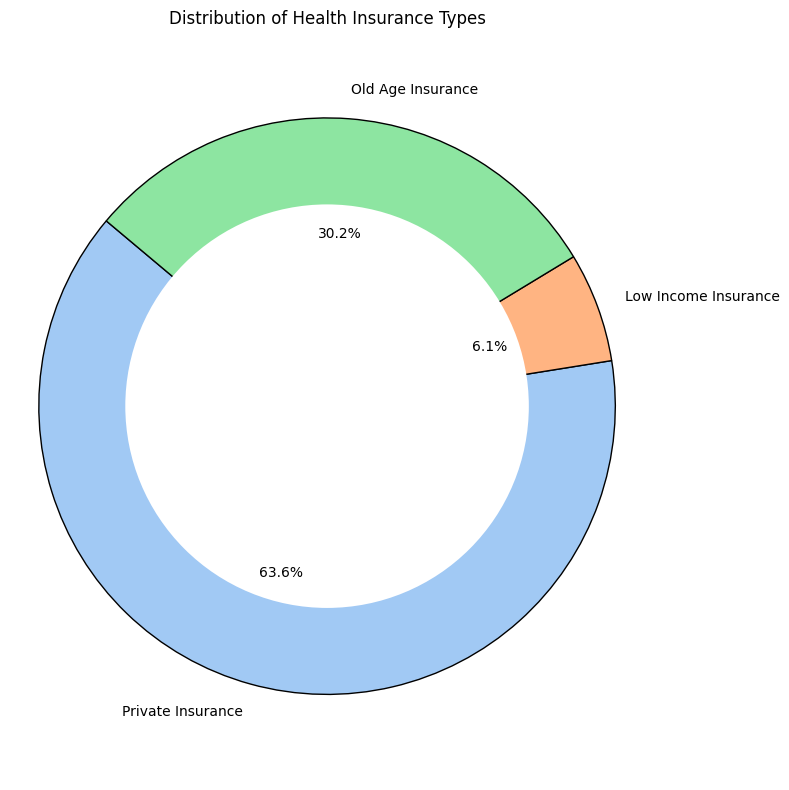

In [3]:
# Create a donut chart for the health insurance distribution
plt.figure(figsize=(8, 8))

# Define colors for each section
colors = sns.color_palette('pastel')[0:3]

# Create a pie chart
plt.pie(percentages, labels=insurance_types, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Draw a circle at the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Health Insurance Types')
plt.axis('equal')  
plt.tight_layout()
plt.show()

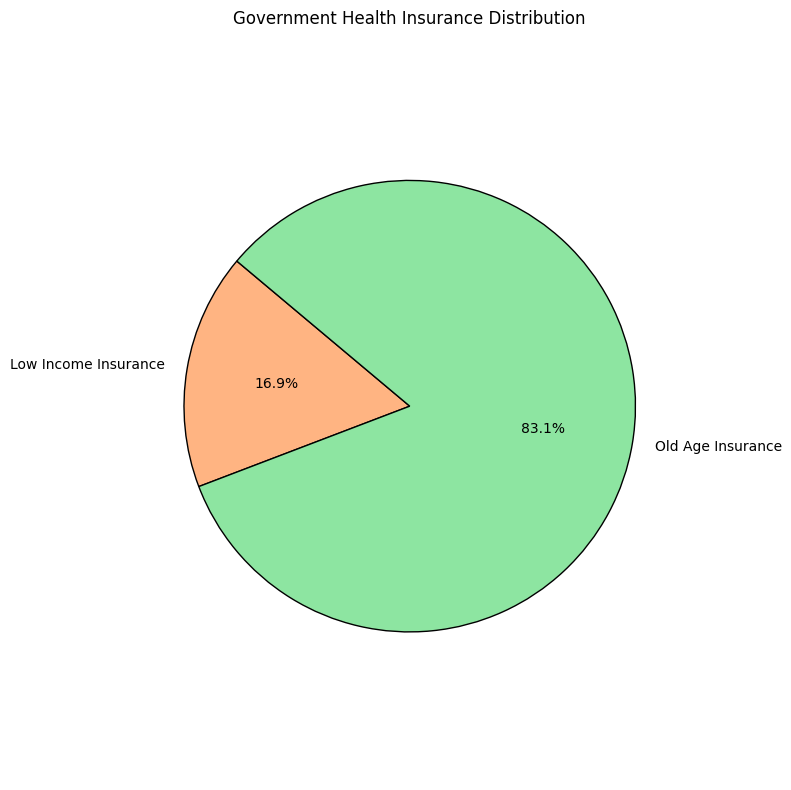

In [4]:
# Create a pie chart to visualize the percentage of people getting government health insurance due to low income and old age
plt.figure(figsize=(8, 8))

# Define data for government insurance types
insurance_labels = ['Low Income Insurance', 'Old Age Insurance']
govt_insurance_percentages = [freepoor_insurance, freerepat_insurance]

# Define colors for each section
colors = sns.color_palette('pastel')[1:3]

# Create a pie chart
plt.pie(govt_insurance_percentages, labels=insurance_labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Government Health Insurance Distribution')
plt.axis('equal')  
plt.tight_layout()
plt.show()

The pie chart above visualizes the distribution of government health insurance among the population, specifically highlighting the percentages of people receiving insurance due to low income and old age. This visualization helps in understanding the relative proportions of these two categories within the government insurance framework.

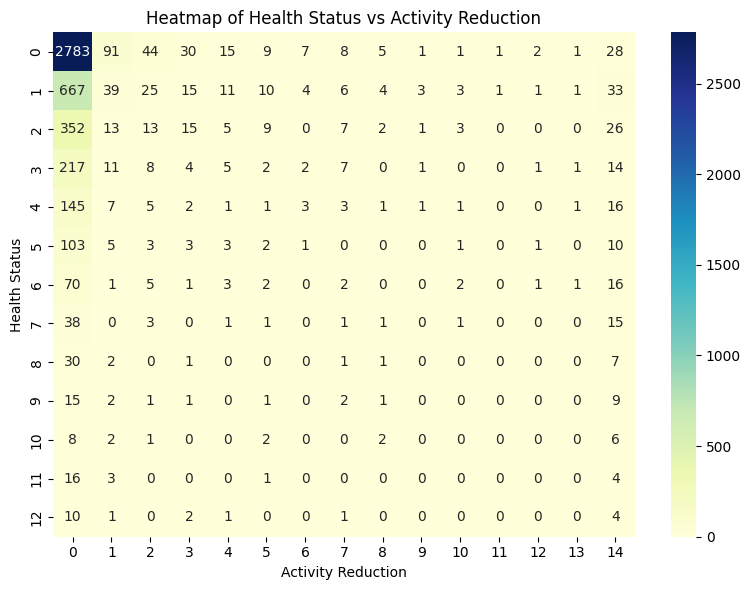

In [5]:
# Create a heatmap to visualize the relationship between health status and activity reduction
plt.figure(figsize=(8, 6))

# Create a pivot table for the heatmap
df_pivot = df.pivot_table(index='health', columns='reduced', aggfunc='size', fill_value=0)

# Plot the heatmap
sns.heatmap(df_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Health Status vs Activity Reduction')
plt.xlabel('Activity Reduction')
plt.ylabel('Health Status')
plt.tight_layout()
plt.show()

The heatmap shows the relationship between health status (0-1) and activity reduction levels (0-5), where darker colors indicate higher frequencies of occurrences.

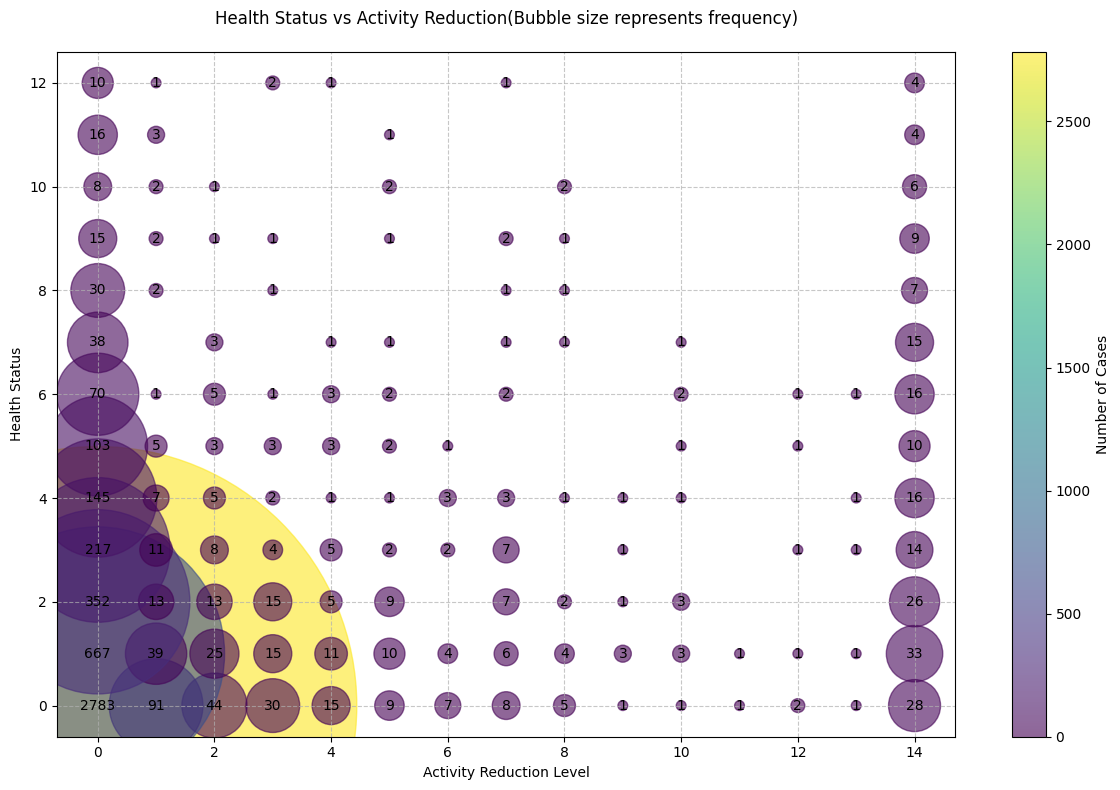

Summary of Health Status and Activity Reduction Relationship:
Total number of cases: 5190
Distribution of Activity Reduction Levels:
0     4454
1      177
2      108
3       74
4       45
5       40
6       17
7       38
8       17
9        7
10      12
11       2
12       6
13       5
14     188
Name: reduced, dtype: int64


In [6]:
import numpy as np

# Create a cross-tabulation of health status and activity reduction
cross_tab = pd.crosstab(df['health'], df['reduced'])

# Create coordinates for the bubbles
health_vals = []
reduced_vals = []
sizes = []

for i in range(len(cross_tab.index)):
    for j in range(len(cross_tab.columns)):
        health_vals.append(cross_tab.index[i])
        reduced_vals.append(cross_tab.columns[j])
        sizes.append(cross_tab.iloc[i, j])

# Create the bubble plot
plt.figure(figsize=(12, 8))

# Create scatter plot with sized bubbles
scatter = plt.scatter(reduced_vals, health_vals, s=[x*50 for x in sizes], 
                     c=sizes, cmap='viridis', alpha=0.6)

# Customize the plot
plt.title('Health Status vs Activity Reduction\
(Bubble size represents frequency)', pad=20)
plt.xlabel('Activity Reduction Level')
plt.ylabel('Health Status')

# Add a colorbar
plt.colorbar(scatter, label='Number of Cases')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add annotations for bubble sizes
for i in range(len(health_vals)):
    if sizes[i] > 0:  # Only annotate non-zero values
        plt.annotate(str(sizes[i]), 
                    (reduced_vals[i], health_vals[i]),
                    horizontalalignment='center',
                    verticalalignment='center')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\
Summary of Health Status and Activity Reduction Relationship:")
print("\
Total number of cases:", sum(sizes))
print("\
Distribution of Activity Reduction Levels:")
print(df['reduced'].value_counts().sort_index())

This bubble chart provides an innovative visualization of the relationship between health status and activity reduction:

The size and color intensity of each bubble represents the frequency of cases
The x-axis shows the activity reduction levels (0-5)
The y-axis represents health status (0-1)
Larger, darker bubbles indicate more frequent combinations
Numbers inside bubbles show the exact count of cases
Key observations:

Most people have low activity reduction levels (0-1)
There's a notable relationship between health status and activity reduction
The largest concentration is at health status 0 with minimal activity reduction

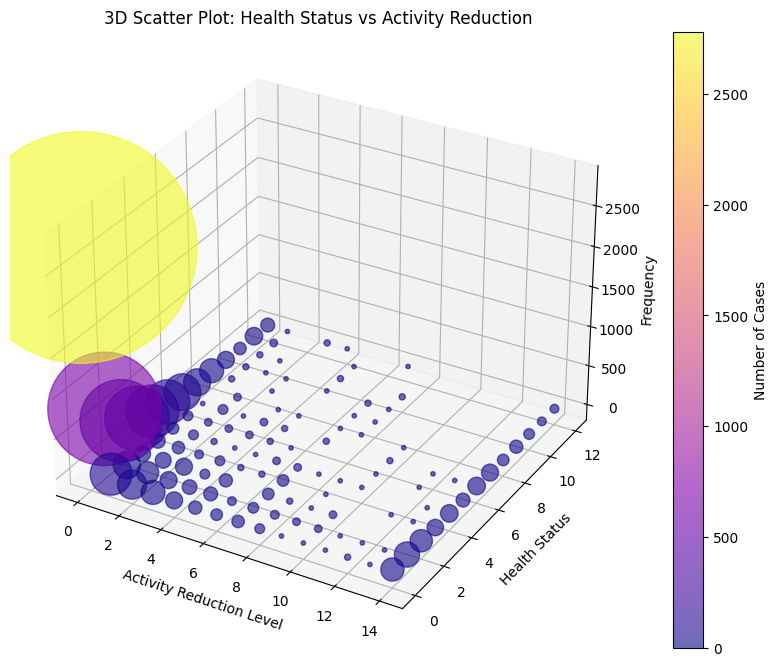

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(reduced_vals, health_vals, sizes, c=sizes, cmap='plasma', s=[x*10 for x in sizes], alpha=0.6)

# Set labels
ax.set_title('3D Scatter Plot: Health Status vs Activity Reduction')
ax.set_xlabel('Activity Reduction Level')
ax.set_ylabel('Health Status')
ax.set_zlabel('Frequency')

# Add color bar
fig.colorbar(scatter, ax=ax, label='Number of Cases')

plt.show()

The 3D scatter plot provides a unique visualization by adding depth to the analysis, showing the relationship between health status and activity reduction with frequency as the third dimension. This allows for a more comprehensive understanding of how these variables interact.